In [1]:
import numpy as np, basic, plottools as pl
from matplotlib.pyplot import *

In [2]:
def load_Sl(f,D='data_local/skewspec/test/'):
    data = np.load(D+f,allow_pickle=True)
    #print(data.files)
    #cp = data['cp'].item()
    Sl = data['Sl'].item()
    return Sl

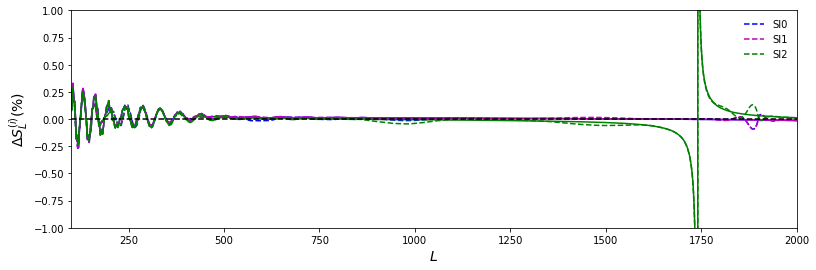

FileNotFoundError: [Errno 2] No such file or directory: 'data_local/skewspec/test/Sl_grid0-1_zs1.0334_zn40_l100-2000_1900.npz'

In [15]:
#for grid in ['0-0']:
for grid in ['0-0','0-1','1-0','1-1']:
    Sl0 = load_Sl('../emu/Sl_grid'+grid+'_zs1.0334_zn30_l100-2000_40.npz')
    Sl1 = load_Sl('Sl_grid'+grid+'_zs1.0334_zn30_l100-2000_1900.npz')
    Sl2 = load_Sl('Sl_grid'+grid+'_zs1.0334_zn40_l100-2000_1900.npz')
    pl.plot_1dstyle(fsize=[13,4],ymin=-1,ymax=1,xmin=100,xmax=2000,ylab=r'$\Delta S^{(i)}_L (\%)$')
    for s, c in zip(['Sl0','Sl1','Sl2'],['b','m','g']):
        plot(Sl0['L'],(Sl0[s]/Sl2[s]-1)*100,color=c,label=s,ls='--')
        plot(Sl0['L'],(Sl1[s]/Sl2[s]-1)*100,color=c)
    axhline(0,color='k',ls='--')
    legend()
    show()

In [ ]:
lmin = 100
lmid = 800
lmax = 2000
num = 50
x1 = np.arange(-np.pi/2.,np.pi/50.,np.pi/50.)
x2 = np.arange(0.,np.pi/2.+np.pi/100.,np.pi/100.)
b1 = np.sin(x1)
b2 = np.sin(x2)
db1 = 0.*b1
db1[1:] = (b1[1:]-b1[:-1])*(lmid-lmin)/(b1[-1]-b1[0])
db2 = 0.*b2
db2[1:] = (b2[1:]-b2[:-1])*(lmax-lmid)/(b2[-1]-b2[0])
l1 = lmin + np.cumsum(db1)
l2 = lmid + np.cumsum(db2)
l = np.concatenate((l1,l2))
print(np.unique(l.astype(int)))